# Part II - PISA Data
## by Abdessalam Dai

## Investigation Overview

In this investigation, I wanted to look more closely at the environmental factors that both parents and students brought to the overall PISA scores, the differences in scores between the sexes, and the countries that performed the best. Gender, parental presence at home, and country were the main considerations.

## Dataset Overview

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline


# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe by selecting these columns
features = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH',
       'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ',
        'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE',
        'WEALTH', 'CNT', 'ST04Q01', 'HISCED',
        'TIMEINT', 'ST11Q01', 'ST11Q02'
       ]

df = pd.read_csv('pisa2012.csv', sep=",", encoding = "ISO-8859-1", usecols=features)

# calculate average score for different subjects
df['math_avg'] = df.loc[:, ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH']].mean(axis=1)
df['reading_avg'] = df.loc[:, ['PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ']].mean(axis=1)
df['science_avg'] = df.loc[:, ['PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']].mean(axis=1)

# drop old score columns
df.drop(columns=['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH',
                 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ',
                 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace=True)

# rename columns to appropriate names
df.rename({'WEALTH': 'wealth', 'CNT': 'country', 'ST04Q01': 'gender',
          'HISCED': 'parents_education_level', 'TIMEINT': 'computer_use_time',
          'ST11Q01': 'mother_at_home', 'ST11Q02': 'father_at_home'}, 
          axis='columns', inplace=True)

## Score VS Gender

- Male students outperform female students in math while female students outperform male students in reading. In terms of average science scores, both genders are almost equal.
- Males consistently perform better than females in math. But when it comes to reading, it's the opposite.

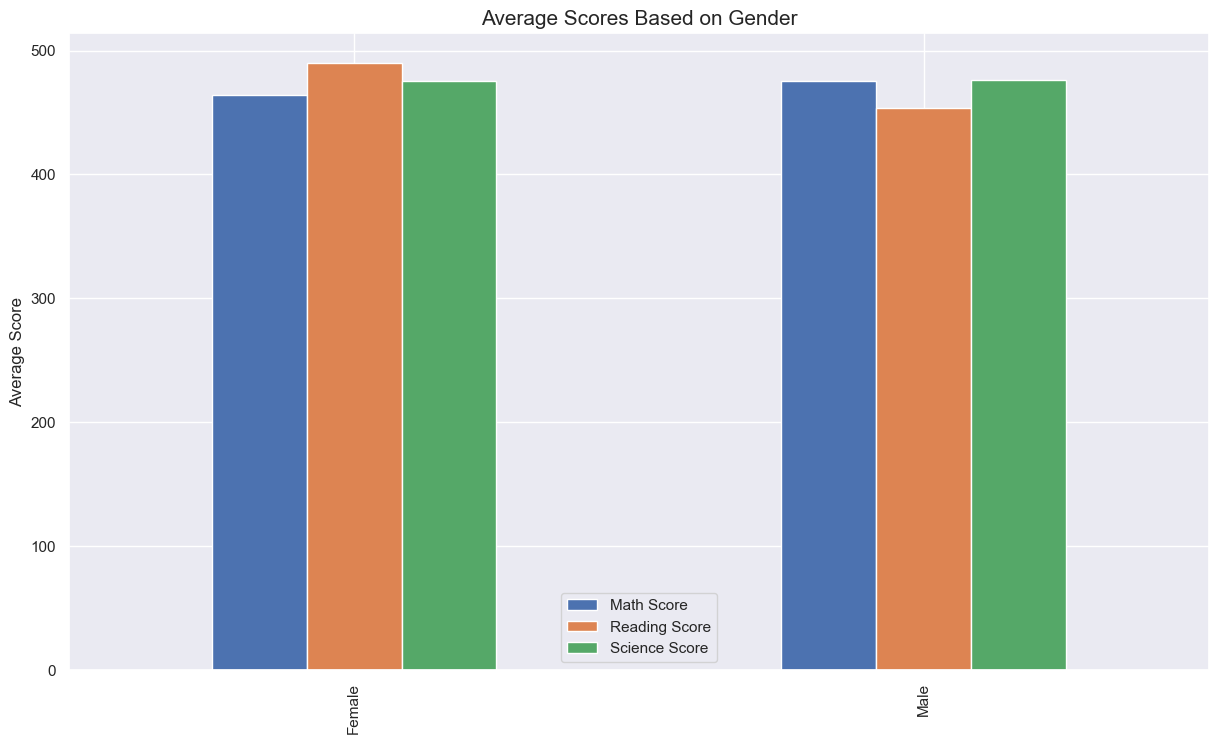

In [7]:
sns.set(rc = {'figure.figsize':(14.70,8.27)})

genders_scores = df.groupby(['gender']).mean().loc[:, ['math_avg', 'reading_avg', 'science_avg']]
genders_scores.rename({'math_avg': 'Math Score', 
                       'reading_avg': 'Reading Score', 
                       'science_avg': 'Science Score'}, inplace=True, axis=1)
ax = genders_scores.plot.bar();
ax.set(xlabel='', ylabel='Average Score');
plt.title('Average Scores Based on Gender', size=15);

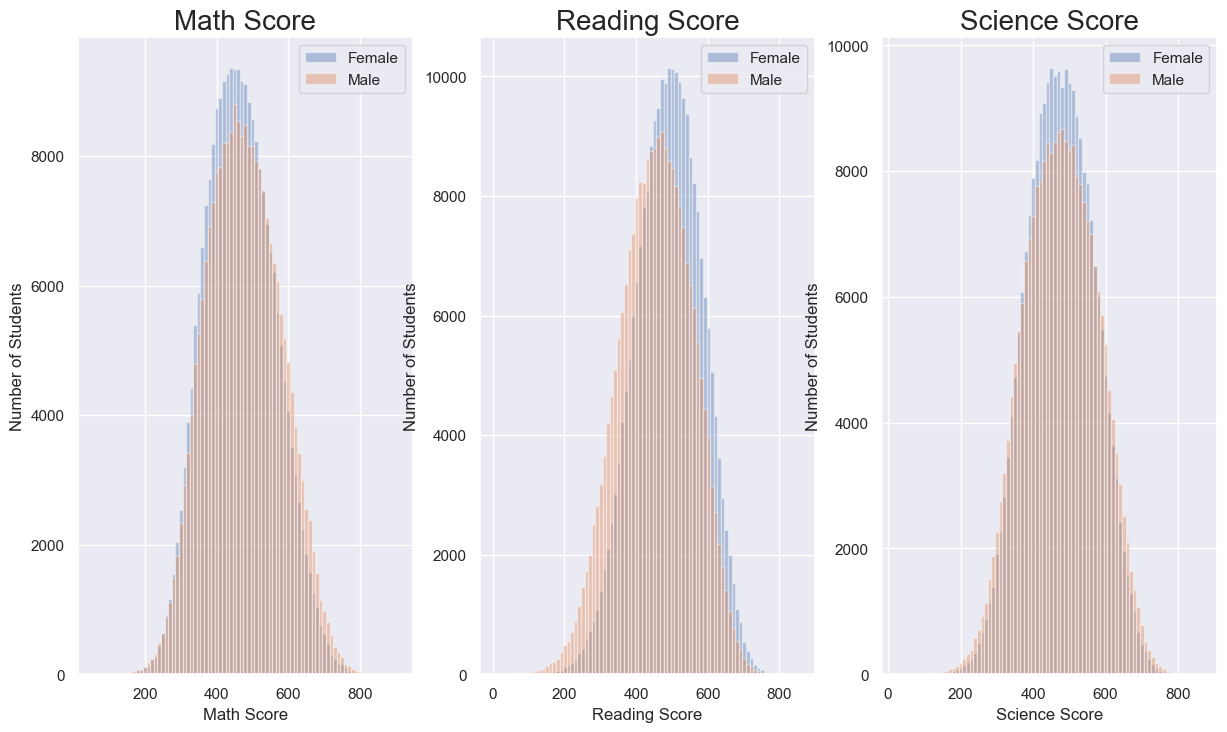

In [9]:
fig = plt.figure()

binsize = 10

subjects_scores = {'Math Score': 'math_avg', 'Reading Score': 'reading_avg', 'Science Score': 'science_avg'}
for idx, sub in enumerate(subjects_scores):
    bin_edges = np.arange(df[subjects_scores[sub]].min(), df[subjects_scores[sub]].max()+binsize, binsize)
    ax = fig.add_subplot(1,3,idx+1)
    plt.hist(data=df.query('gender == "Female"'), x=subjects_scores[sub], alpha=.4, bins=bin_edges, label='Female')
    plt.hist(data=df.query('gender == "Male"'), x=subjects_scores[sub], alpha=.4, bins=bin_edges, label='Male')
    plt.legend();
    ax.set(xlabel=sub, ylabel='Number of Students')
    plt.title(f'{sub}', size=20);

## Parental Companionship in Math, Reading and Science

If at least one parent is home, the child scores higher than a child whose parents are not home.

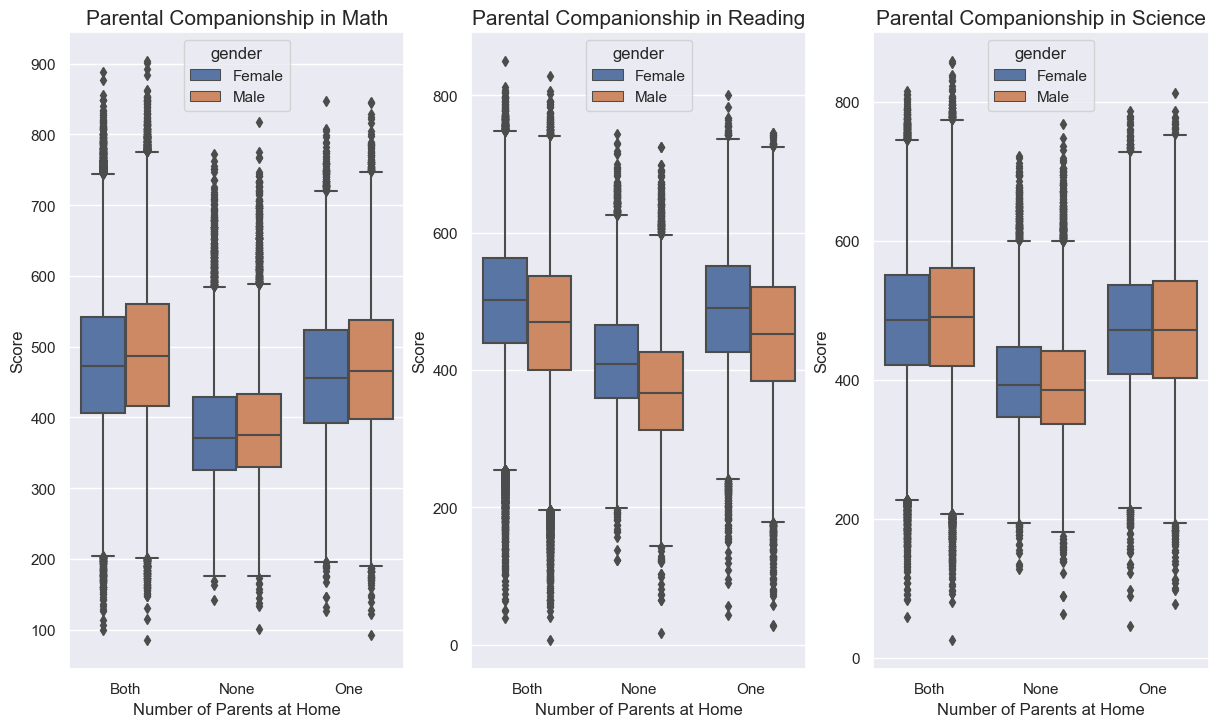

In [16]:
df['father_at_home'] = df['father_at_home'].replace({'Yes': 1, 'No': 0})
df['mother_at_home'] = df['mother_at_home'].replace({'Yes': 1, 'No': 0})

df['parents_at_home'] = df['father_at_home'] + df['mother_at_home']
df['parents_at_home'] = df['parents_at_home'].replace({0: 'None', 1: 'One', 2: 'Both'})


ax1 = plt.subplot(1, 3, 1)
ax1 = sns.boxplot(data=df, x='parents_at_home', y='math_avg', hue='gender');
ax1.set(xlabel='Number of Parents at Home', ylabel='Score')
plt.title('Parental Companionship in Math', size=15);

ax2 = plt.subplot(1, 3, 2)
ax2 = sns.boxplot(data=df, x='parents_at_home', y='reading_avg', hue='gender');
ax2.set(xlabel='Number of Parents at Home', ylabel='Score')
plt.title('Parental Companionship in Reading', size=15);

ax3 = plt.subplot(1, 3, 3)
ax3 = sns.boxplot(data=df, x='parents_at_home', y='science_avg', hue='gender');
ax3.set(xlabel='Number of Parents at Home', ylabel='Score')
plt.title('Parental Companionship in Science', size=15);

## Average Score in Different Countries for Each Subject

Here, we can see how different scores are distributed among the various countries.

- Math: East Asian countries have higher average math test scores include China, Korea, Singapore, and Hong Kong.
- Science: Singapore, Finland and Australia are more significant
- Reading: Successful countries included Spain, Singapore, New Zealand, China, and Japan.

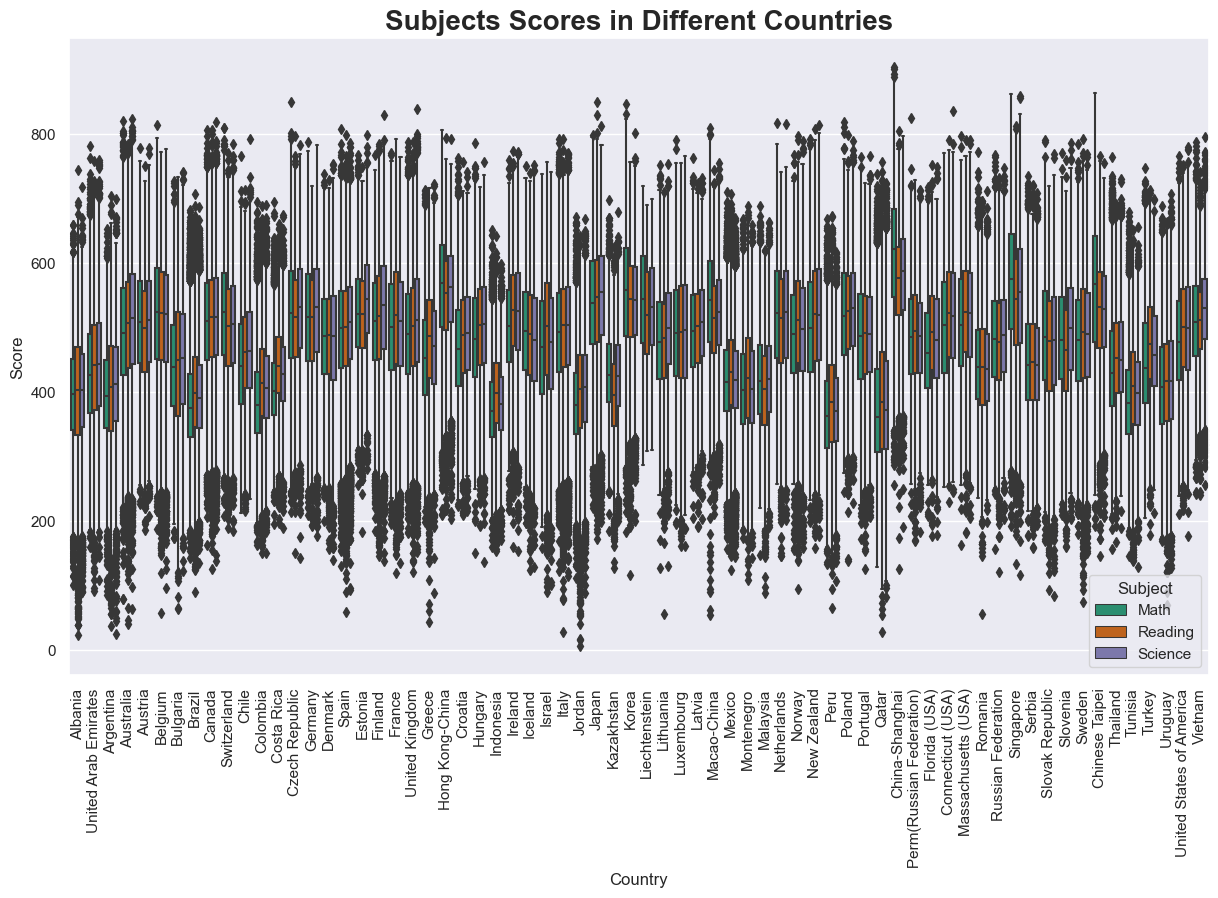

In [17]:
# put subjects  and their scores in columns
data = df[['gender', 'math_avg', 'reading_avg', 'science_avg', 'country']].melt(id_vars=['gender', 'country'],
                                                                               var_name='Subject',
                                                                               value_name='Scores')
# rename subjects
data['Subject'] = data['Subject'].map({'math_avg': 'Math', 'reading_avg': 'Reading', 'science_avg': 'Science'})

ax = sns.boxplot(data=data, x='country', y='Scores', hue='Subject', palette='Dark2');
ax.set(ylabel='Score', xlabel='Country')
plt.title('Subjects Scores in Different Countries', weight='bold', size=20);
plt.xticks(rotation=90);

In [18]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 1108591 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
Opening in existing browser session.
^C

Interrupted
